In [2]:
import pandas as pd
import swifter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

df= pd.read_csv('dataset_diabetes/diabetic_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
df.shape

(101766, 50)

Replacing Question Mark with NAN

In [5]:
import numpy as np
df.replace({'?':np.nan},inplace=True)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
null_feature=[i for i in df.columns if df[i].isnull().sum()>=1]
print('Null features {} \n'.format(null_feature))
print('Feature \t null_count \t not_null_count')
for i in null_feature:
    print('{} \t {} \t\t {}'.format(i,df[i].isnull().sum(),df[i].count()))

Null features ['race', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3'] 

Feature 	 null_count 	 not_null_count
race 	 2273 		 99493
weight 	 98569 		 3197
payer_code 	 40256 		 61510
medical_specialty 	 49949 		 51817
diag_1 	 21 		 101745
diag_2 	 358 		 101408
diag_3 	 1423 		 100343


In [7]:
#Dropping columns with count of null values around the count of not null values. As they dont provide significant information.
df.drop(['weight','payer_code','medical_specialty'],axis=1,inplace=True)


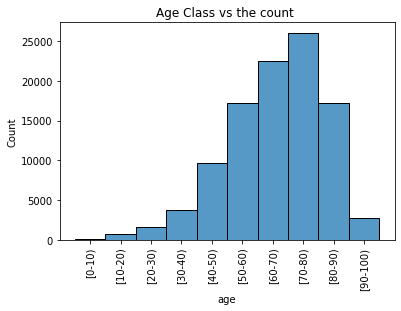

In [8]:
sns.histplot(df['age'],bins=10)
plt.xticks(rotation=90)
plt.title('Age Class vs the count ')
plt.show()

In the above graph, at x axis we see the range. Lets convert the range to numbers by taking mean of each range

In [9]:
df['age'] = df['age'].replace({'[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, '[40-50)': 45, '[50-60)': 55, '[60-70)': 65, '[70-80)': 75, '[80-90)': 85, '[90-100)': 95})

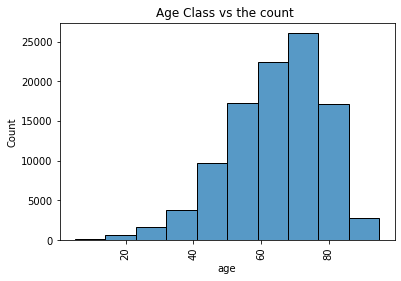

In [10]:








sns.histplot(df['age'],bins=10)
plt.xticks(rotation=90)
plt.title('Age Class vs the count ')
plt.show()

From the above plot it can be seen that data for age feature seems skewed towards the higher age

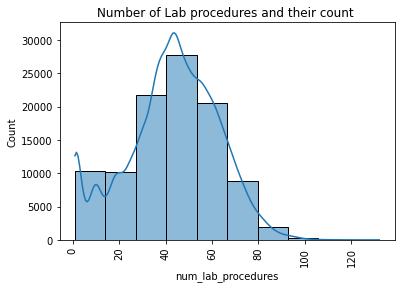

In [11]:
sns.histplot(df['num_lab_procedures'],bins=10,kde=True)
plt.xticks(rotation=90)
plt.title('Number of Lab procedures and their count ')
plt.show()

From the above plot it can be seen that data for number of lab procedure feature seems skewed and bimodal.

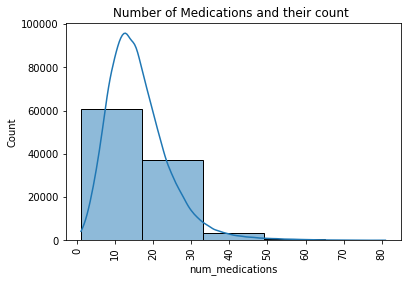

In [12]:
sns.histplot(df['num_medications'],kde=True,bins=5)
plt.xticks(rotation=90)
plt.title('Number of Medications and their count ')
plt.show()

From the above plot it can be seen that data for number of mdeication feature seems normally distributed and right tailed.

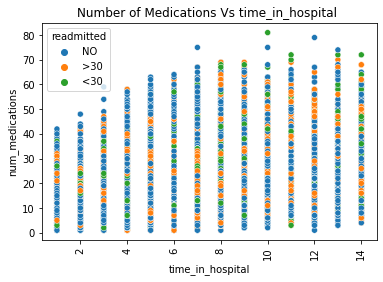

In [13]:
sns.scatterplot(data=df, x='time_in_hospital', y='num_medications',hue='readmitted')
plt.xticks(rotation=90)
plt.title('Number of Medications Vs time_in_hospital ')
plt.show()

Changing the readmitted column by making the target variable as binary class having two values
For No-0 and for yes i.e >30 or < 30 - 1

In [14]:
df['readmitted'] = df['readmitted'].replace({'>30':1,'<30':1,'NO':0})

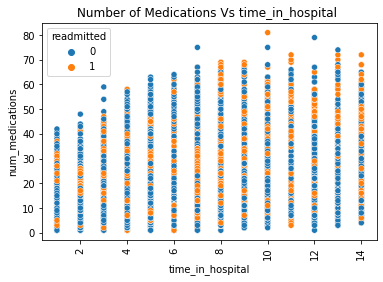

In [15]:
sns.scatterplot(data=df, x='time_in_hospital', y='num_medications',hue='readmitted')
plt.xticks(rotation=90)
plt.title('Number of Medications Vs time_in_hospital ')
plt.show()

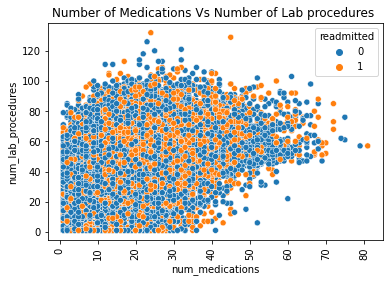

In [16]:
sns.scatterplot(data=df, x='num_medications', y='num_lab_procedures', hue='readmitted')
plt.xticks(rotation=90)
plt.title('Number of Medications Vs Number of Lab procedures ')
plt.show()

In [17]:
df[['time_in_hospital', 'num_medications','num_lab_procedures','readmitted']].corr()

,time_in_hospital,num_medications,num_lab_procedures,readmitted
time_in_hospital,1.000000,0.466135,0.318450,0.051289
num_medications,0.466135,1.000000,0.268161,0.046772
num_lab_procedures,0.318450,0.268161,1.000000,0.039253
readmitted,0.051289,0.046772,0.039253,1.000000


# EDA

In [18]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [19]:
for i in df.select_dtypes(include=['int', 'float']).columns.to_list():
    print('The numeric feature is {} \n The value counts are {}'.format(i,df[i].value_counts()) )

The numeric feature is encounter_id 
 The value counts are 2278392      1
190792044    1
190790070    1
190789722    1
190786806    1
            ..
106665324    1
106657776    1
106644876    1
106644474    1
443867222    1
Name: encounter_id, Length: 101766, dtype: int64
The numeric feature is patient_nbr 
 The value counts are 88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: patient_nbr, Length: 71518, dtype: int64
The numeric feature is age 
 The value counts are 75    26068
65    22483
55    17256
85    17197
45     9685
35     3775
95     2793
25     1657
15      691
5       161
Name: age, dtype: int64
The numeric feature is admission_type_id 
 The value counts are 1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64
The numeric feature is discharge_disposition_id 
 The value co

Here encounter_id, patient_nbr are the unique ids and wont help in clustering as they contain unique data and we cant forms groups. We can drop them

In [20]:
df.drop(columns=['encounter_id','patient_nbr'],inplace=True,axis=1)

In [21]:
print(df.select_dtypes(include=['object']).columns.to_list())

['race', 'gender', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']


Object columns include majority of medications.

In [22]:
meds=['max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
      'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 
      'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
      'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']
df_value_counts=pd.DataFrame()
for i in meds:
    value_counts=df[i].value_counts()
    percent = []
    for j in value_counts.index:
        percent.append(value_counts[j] *100/ len(df))
    ## PErcentage dataframe to store the feature, its unique values, the count and the percentage
    df_temp=pd.DataFrame({'Feature':i,'Value': value_counts.index, 'Count': value_counts.values, 'Percentage': percent})
    df_value_counts=pd.concat([df_value_counts,df_temp],ignore_index=True)
df_value_counts.head(80)  

,Feature,Value,Count,Percentage
0,max_glu_serum,None,96420,94.746772
1,max_glu_serum,Norm,2597,2.551933
2,max_glu_serum,>200,1485,1.459230
3,max_glu_serum,>300,1264,1.242065
4,A1Cresult,None,84748,83.277322
...,...,...,...,...
74,glimepiride-pioglitazone,Steady,1,0.000983
75,metformin-rosiglitazone,No,101764,99.998035
76,metformin-rosiglitazone,Steady,2,0.001965
77,metformin-pioglitazone,No,101765,99.999017


From the above dataframe it can be seen that some of the features have data of almost one type.
To make clusters we require data of all types in a column as that will help identifying differences or similarity in the data
If all the data is of one type, it is not useful for clustering. Hence removing columns with Percentage > 95.

In [23]:
skewed_data=df_value_counts[df_value_counts['Percentage']>95]['Feature'].to_list()
df.drop(columns=skewed_data,inplace=True)

Performing label encoding on the categorical columns

In [24]:
label_encoded_columns=[]
for i in df.select_dtypes(include=['object']).columns.to_list():
    if i not in skewed_data:
        label_encoded_columns.append(i)
## The columns remaining after all the EDA that are to be label encoded

In [25]:
df_cleaned_dia=df.copy()
## creating the copy of data before performing label encoding and one hot encoding
one_hot = pd.get_dummies(df_cleaned_dia[['gender','race']])
label_encoded_columns.remove('diag_1')
label_encoded_columns.remove('diag_2')
label_encoded_columns.remove('diag_3')
label_encoded_columns.remove('gender')
label_encoded_columns.remove('race')
# combine the one-hot encoded columns with the original dataframe
df_cleaned_dia = pd.concat([df_cleaned_dia, one_hot], axis=1)
df_cleaned_dia.drop(columns=['diag_1','diag_2','diag_3','gender','race'],inplace=True)
##
df_cleaned_dia[label_encoded_columns]=df_cleaned_dia[label_encoded_columns].swifter.apply(LabelEncoder().fit_transform)

Pandas Apply:   0%|          | 0/11 [00:00<?, ?it/s]

Have performed one hot encoding for race and gender as the columns are not ordinal.
For rest of the columns performed label encoding . The column diag1,diag2, diag3 are been dropped.
These 3 columns are categorical columns and in k means the categorical columns are not highly preferred for clustering. Also, these columns contains around 700 unique classes, so intotal more than 2100 columns will become the part of dataset, this will cause the clustering around diag1,diag2, diag3 and rest columns will get shadowed.
There is high chance of model getting overfit due to these categorical data and will increase the dimensions and the curse of dimensionality comes into picture.Hence dropping these columns.

In [26]:
df_cleaned_dia.shape

(101766, 32)

# Kmeans LLloyd

In [27]:
import pandas as pd
import numpy as np
import swifter
from scipy.spatial.distance import euclidean


def initialize_centroids(df, k):
    """
    Function to initialize random centroids from dataset.
    Input: 
        - df: pandas dataframe with the data
        - k: integer number of clusters
    Output: 
        - temp_df: pandas dataframe with the centroids as columns and index as label
    """
    centroids = []
    for i in range(k):
        centroids.append(df.apply(lambda x: float(x.sample()))) # Take a random sample from each column to create a centroid
    centroids = pd.concat(centroids, axis=1)
    centroids.index.name = 'Label'

    return centroids


def assign_labels(df, centroids):
    """
    Function to calculate the closest centroid label for each row in a dataframe.
    Input: 
        - df: pandas dataframe with the data
        - centroids: pandas dataframe with the centroids as columns and index as label
    Output: 
        - distances.idxmin(axis=1): pandas series with the label of the closest centroid for each row in df
    """
    distances = centroids.swifter.apply(lambda x: np.sqrt(((df - x) ** 2).sum(axis=1))) # Calculate the Euclidean distance between each row in df and each centroid
    return distances.idxmin(axis=1) # Get the index of the minimum distance, which corresponds to the label of the closest centroid


def new_centroids(df_label, df1):
    """
    Function to calculate the new centroids based on the current labels of the rows.
    Input: 
        - df_label: pandas series with the label of the closest centroid for each row in df1
        - df1: pandas dataframe with the data
    Output: 
        - new_centroids.T: pandas dataframe with the new centroids as columns and index as feature name
    """
    joined_df = df1.join(df_label)
    joined_df.rename(columns={0: 'Label'}, inplace=True) # Rename the column with the label
    # Calculate the mean of the rows with the same label
    return joined_df.groupby('Label').mean().T # Transpose the dataframe to have the new centroids as columns and index as feature name


def kmeans_lyod(df1, k, tou):
    """
    Function to run the K-means Lloyd algorithm.
    Input: 
        - df1: pandas dataframe with the data
        - k: integer number of clusters
        - tou: float tolerance level to stop the algorithm
    Output: 
        - centroids: pandas dataframe with the final centroids as columns and index as label
    """
    
    centroids = initialize_centroids(df1, k) # Initialize random centroids
    initial_list_of_columns = centroids.columns.to_list()
    iteration = 0
    while True:
        # Assign labels to current centroids
        df_label = assign_labels(df1, centroids)
        df_label = pd.DataFrame(df_label)
        # Calculate new centroids
        df_new_centroids = new_centroids(df_label, df1)
        new_list_of_columns = df_new_centroids.columns.to_list()
        # Keep the number of clusters the same i.e maintain same k
        for i in initial_list_of_columns:
            if i not in new_list_of_columns:
                df_new_centroids[i] = centroids[i]
        # Calculate tao
        distance = []
        for col in centroids.columns:
            col_distance = euclidean(centroids[col], df_new_centroids[col])
            distance.append(col_distance)
        tao_calculated=sum(distance)/k #Used the formula provided for calculating Tao
        
        
        if iteration>100:  
            print("Iteration exceeded")
            
        if tao_calculated<tou or iteration >100:   #if the convergence is met, kmeans will stop  or else if the convergence is never met, after 100 iteration code will stop 
            return df_new_centroids
            break                                   # otherwise indefinite loop
        else:
            centroids= df_new_centroids # In case we need more iterations, the centroids calculated at this step acts as input
        iteration+=1
       


In [28]:
kmeans_lyod(df_cleaned_dia,2,10)

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Label,0,1
age,75.232857,48.704600
admission_type_id,2.011024,2.048192
discharge_disposition_id,4.154030,2.898917
admission_source_id,5.833044,5.607990
time_in_hospital,4.739010,3.756928
num_lab_procedures,45.363797,38.870024
num_procedures,1.358557,1.304656
num_medications,16.836864,14.503446
number_outpatient,0.389574,0.331692
number_emergency,0.144894,0.296469


# Kmeans with error

In [29]:
import time
def initialize_centroids(df, k):
    """
    Function to initialize random centroids from dataset.
    Input: 
        - df: pandas dataframe with the data
        - k: integer number of clusters
    Output: 
        - temp_df: pandas dataframe with the centroids as columns and index as label
    """
    centroids = []
    for i in range(k):
        centroids.append(df.apply(lambda x: float(x.sample()))) # Take a random sample from each column to create a centroid
    centroids = pd.concat(centroids, axis=1)
    centroids.index.name = 'Label'

    return centroids


def assign_labels(df, centroids):
    """
    Function to calculate the closest centroid label for each row in a dataframe.
    Input: 
        - df: pandas dataframe with the data
        - centroids: pandas dataframe with the centroids as columns and index as label
    Output: 
        - distances.idxmin(axis=1): pandas series with the label of the closest centroid for each row in df
    """
    distances = centroids.swifter.apply(lambda x: np.sqrt(((df - x) ** 2).sum(axis=1))) # Calculate the Euclidean distance between each row in df and each centroid
    return distances.idxmin(axis=1) # Get the index of the minimum distance, which corresponds to the label of the closest centroid


def new_centroids(df_label, df1):
    """
    Function to calculate the new centroids based on the current labels of the rows.
    Input: 
        - df_label: pandas series with the label of the closest centroid for each row in df1
        - df1: pandas dataframe with the data
    Output: 
        - new_centroids.T: pandas dataframe with the new centroids as columns and index as feature name
    """
    joined_df = df1.join(df_label)
    joined_df.rename(columns={0: 'Label'}, inplace=True) # Rename the column with the label
    # Calculate the mean of the rows with the same label
    return joined_df.groupby('Label').mean().T # Transpose the dataframe to have the new centroids as columns and index as feature name



def error_clusters(df_new_centroids,df1,df_label):
    """
    Calculate the error rate of each cluster.

    Args:
    - df_label (pandas.DataFrame): the label of the nearest centroid for each data point.
    - df1 (pandas.DataFrame): the dataset.
    - df_new_centroids (pandas.DataFrame): The new centroids computed in the current iteration.

    Returns:
    - error_rate (float): the total error rate of all clusters.
    """
    

    #Calculate mean value 
    mean_centroid=df1.groupby('readmitted').mean().reset_index()
    # Transpose the new centroids dataframe and reset the index
    new_centroids= df_new_centroids.T
    # Get the columns of the data dataframe
    columns = df1.columns

    sse = []
    # Compute the distance between each data point and its assigned centroid
    for i in range(len(new_centroids)):   #### centroid
        s=[]
        for j in range(len(mean_centroid)): ### mean centroid
        # Compute the distance between each data point and its assigned centroid
            distance = np.sum(np.square(mean_centroid[mean_centroid['readmitted']==j][columns] - new_centroids.iloc[i][columns]), axis=1)
            s.append(distance.iloc[0])
        sse.append(s)
    ## key  is the cluster number and value is the merged value
    merge_label=pd.DataFrame(sse).idxmin(axis=1).to_dict() 
    ## Merging cluster based on the target variable
    df_label[0]=df_label[0].replace(merge_label)
    
    df1 = df1.join(df_label) # add the label column to the dataset
    df1.rename(columns={0: 'Label'}, inplace=True) # rename the label column
    error_list = []
    for i in df1['Label'].value_counts().index:
        df_cluster = df1[df1['Label'] == i] # filter the dataset to include only the data points in the current cluster
        y = len(df_cluster[df_cluster['readmitted'] == 1]) # count the number of data points in the current cluster that were readmitted
        n = len(df_cluster[df_cluster['readmitted'] == 0]) # count the number of data points in the current cluster that were not readmitted
        if y == 0 and n == 0:
            error = 0
        else:
            error = n / (n + y) # calculate the error rate of the current cluster
        error_list.append(error)
    return round(sum(error_list),4)


def sum_of_square_error(new_centroids, data, labels):
    """
    Computes the sum of squared errors between the data points and their assigned centroids.

    Args:
    new_centroids (DataFrame): The new centroids computed in the current iteration.
    data (DataFrame): The input data points.
    labels (DataFrame): The labels assigned to each data point.

    Returns:
    The sum of squared errors.
    """
    # Transpose the new centroids dataframe and reset the index
    new_centroids = new_centroids.T.reset_index()
    # Get the columns of the data dataframe
    columns = data.columns
    # Join the data dataframe and the labels dataframe
    data = data.join(labels)
    # Rename the '0' column of the labels dataframe to 'Label'
    data.rename(columns={0:'Label'}, inplace=True)
    sse = []
    # Compute the distance between each data point and its assigned centroid
    for i in range(len(new_centroids)):
        distance = np.sum(np.square(data[data['Label']==i][columns] - new_centroids.iloc[i][columns]), axis=1)
        sse.append(sum(distance))
    # Return the sum of squared errors
    return sum(sse)   

def kmeans_lyod_with_error(df1, k, tou):
    """
    Function to run the K-means Lloyd algorithm.
    Input: 
        - df1: pandas dataframe with the data
        - k: integer number of clusters
        - tou: float tolerance level to stop the algorithm
    Output: 
        - centroids: pandas dataframe with the final centroids as columns and index as label
    """
    start_time=time.time()
    centroids = initialize_centroids(df1, k) # Initialize random centroids
    initial_list_of_columns = centroids.columns.to_list()
    iteration = 0
    while True:
        # Assign labels to current centroids
        df_label = assign_labels(df1, centroids)
        df_label = pd.DataFrame(df_label)
        # Calculate new centroids
        df_new_centroids = new_centroids(df_label, df1)
        new_list_of_columns = df_new_centroids.columns.to_list()
        # Keep the number of clusters the same i.e maintain same k
        for i in initial_list_of_columns:
            if i not in new_list_of_columns:
                df_new_centroids[i] = centroids[i]
        # Calculate tao
        distance = []
        for col in centroids.columns:
            col_distance = euclidean(centroids[col], df_new_centroids[col])
            distance.append(col_distance)
        tao_calculated=sum(distance)/k #Used the formula provided for calculating Tao
        sse = sum_of_square_error(df_new_centroids, df1, df_label)
        #error=error_clusters(df_label,df1,k)
        end_time= time.time()
        if iteration>100:  
            error=error_clusters(df_new_centroids,df1,df_label)
            print("Iteration exceeded")

            return error, sse,end_time-start_time
            break
            
        if tao_calculated<tou or iteration >100:   #if the convergence is met, kmeans will stop  or else if the convergence is never met, after 100 iteration code will stop 
            error=error_clusters(df_new_centroids,df1,df_label)
            return error, sse,end_time-start_time
            break                                   # otherwise indefinite loop
        else:
            centroids= df_new_centroids # In case we need more iterations, the centroids calculated at this step acts as input
        iteration+=1



In [30]:
kmeans_lyod_with_error(df_cleaned_dia,2,10)

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

(1.0712, 55230953.12743974, 2.223121404647827)

In [31]:
error_matrix_diab=[]
for i in range(2,6):
    for j in range(1,21):
        error,sse,run_time=kmeans_lyod_with_error(df_cleaned_dia,i,10)
        error_matrix_diab.append([i,j,error,sse,run_time])
error_df_diab= pd.DataFrame(error_matrix_diab,columns=['number_of_cluster', 'iteration', 'error','sse','run_time'])  
error_df_diab

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

,number_of_cluster,iteration,error,sse,run_time
0,2,1,1.0564,6.295068e+07,2.006152
1,2,2,1.0935,5.421210e+07,1.981710
2,2,3,1.1147,6.486511e+07,1.999593
3,2,4,1.0839,6.204066e+07,1.866256
4,2,5,1.0650,6.397447e+07,2.019109
...,...,...,...,...,...
75,5,16,1.0826,3.228656e+07,4.004908
76,5,17,1.0832,3.338909e+07,4.348169
77,5,18,1.0727,3.386236e+07,3.906155
78,5,19,1.0776,3.515227e+07,3.684258


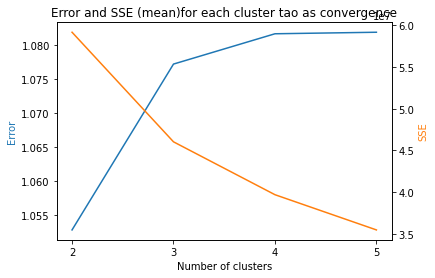

In [32]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
x=error_df_diab['number_of_cluster'].value_counts().index
y1=error_df_diab.groupby(['number_of_cluster']).mean()['error']
ax1.plot(x, y1, color='tab:blue')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Error', color='tab:blue')

ax2 = ax1.twinx()
y2 = error_df_diab.groupby(['number_of_cluster']).mean()['sse']
ax2.plot(x, y2, color='tab:orange')
ax2.set_ylabel('SSE', color='tab:orange')
plt.title('Error and SSE (mean)for each cluster tao as convergence')
plt.xticks(range(2, 6))
plt.show()


The first y axis is to plot error using formula provided and the second y axis is to show sum of square error .
The values for y axis have been averaged out for each cluster.
The x axis is the number of clusters i.e 2,3,4,5. 

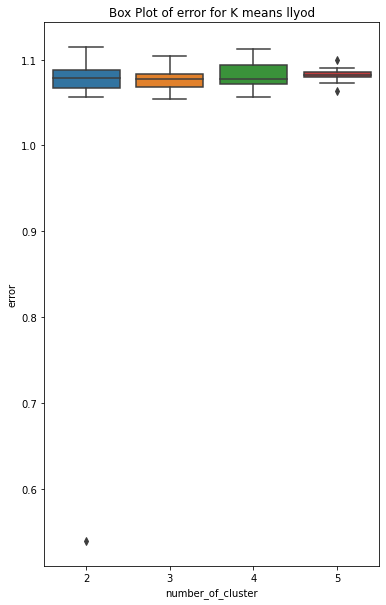

In [33]:
import seaborn as sns
plt.figure(figsize=(6, 10))
sns.boxplot(x=error_df_diab['number_of_cluster'],y=error_df_diab['error'])
plt.title('Box Plot of error for K means llyod')
plt.show()


# Kmeans with SSE Conversion

In [34]:
import time
def initialize_centroids(df, k):
    """
    Function to initialize random centroids from dataset.
    Input: 
        - df: pandas dataframe with the data
        - k: integer number of clusters
    Output: 
        - temp_df: pandas dataframe with the centroids as columns and index as label
    """
    centroids = []
    for i in range(k):
        centroids.append(df.apply(lambda x: float(x.sample()))) # Take a random sample from each column to create a centroid
    centroids = pd.concat(centroids, axis=1)
    centroids.index.name = 'Label'

    return centroids


def assign_labels(df, centroids):
    """
    Function to calculate the closest centroid label for each row in a dataframe.
    Input: 
        - df: pandas dataframe with the data
        - centroids: pandas dataframe with the centroids as columns and index as label
    Output: 
        - distances.idxmin(axis=1): pandas series with the label of the closest centroid for each row in df
    """
    distances = centroids.swifter.apply(lambda x: np.sqrt(((df - x) ** 2).sum(axis=1))) # Calculate the Euclidean distance between each row in df and each centroid
    return distances.idxmin(axis=1) # Get the index of the minimum distance, which corresponds to the label of the closest centroid


def new_centroids(df_label, df1):
    """
    Function to calculate the new centroids based on the current labels of the rows.
    Input: 
        - df_label: pandas series with the label of the closest centroid for each row in df1
        - df1: pandas dataframe with the data
    Output: 
        - new_centroids.T: pandas dataframe with the new centroids as columns and index as feature name
    """
    joined_df = df1.join(df_label)
    joined_df.rename(columns={0: 'Label'}, inplace=True) # Rename the column with the label
    # Calculate the mean of the rows with the same label
    return joined_df.groupby('Label').mean().T # Transpose the dataframe to have the new centroids as columns and index as feature name





def error_clusters(df_new_centroids,df1,df_label):
    """
    Calculate the error rate of each cluster.

    Args:
    - df_label (pandas.DataFrame): the label of the nearest centroid for each data point.
    - df1 (pandas.DataFrame): the dataset.
    - df_new_centroids (pandas.DataFrame): The new centroids computed in the current iteration.

    Returns:
    - error_rate (float): the total error rate of all clusters.
    """
    

    #Calculate mean value 
    mean_centroid=df1.groupby('readmitted').mean().reset_index()
    # Transpose the new centroids dataframe and reset the index
    new_centroids= df_new_centroids.T
    # Get the columns of the data dataframe
    columns = df1.columns

    sse = []
    # Compute the distance between each data point and its assigned centroid
    for i in range(len(new_centroids)):   #### centroid
        s=[]
        for j in range(len(mean_centroid)): ### mean centroid
        # Compute the distance between each data point and its assigned centroid
            distance = np.sum(np.square(mean_centroid[mean_centroid['readmitted']==j][columns] - new_centroids.iloc[i][columns]), axis=1)
            s.append(distance.iloc[0])
        sse.append(s)
    ## key  is the cluster number and value is the merged value
    merge_label=pd.DataFrame(sse).idxmin(axis=1).to_dict() 
    ## Merging cluster based on the target variable
    df_label[0]=df_label[0].replace(merge_label)
    
    df1 = df1.join(df_label) # add the label column to the dataset
    df1.rename(columns={0: 'Label'}, inplace=True) # rename the label column
    error_list = []
    for i in df1['Label'].value_counts().index:
        df_cluster = df1[df1['Label'] == i] # filter the dataset to include only the data points in the current cluster
        y = len(df_cluster[df_cluster['readmitted'] == 1]) # count the number of data points in the current cluster that were readmitted
        n = len(df_cluster[df_cluster['readmitted'] == 0]) # count the number of data points in the current cluster that were not readmitted
        if y == 0 and n == 0:
            error = 0
        else:
            error = n / (n + y) # calculate the error rate of the current cluster
        error_list.append(error)
    return round(sum(error_list),4)





def sum_of_square_error(new_centroids, data, labels):
    """
    Computes the sum of squared errors between the data points and their assigned centroids.

    Args:
    new_centroids (DataFrame): The new centroids computed in the current iteration.
    data (DataFrame): The input data points.
    labels (DataFrame): The labels assigned to each data point.

    Returns:
    The sum of squared errors.
    """
    # Transpose the new centroids dataframe and reset the index
    new_centroids = new_centroids.T.reset_index()
    # Get the columns of the data dataframe
    columns = data.columns
    # Join the data dataframe and the labels dataframe
    data = data.join(labels)
    # Rename the '0' column of the labels dataframe to 'Label'
    data.rename(columns={0:'Label'}, inplace=True)
    sse = []
    # Compute the distance between each data point and its assigned centroid
    for i in range(len(new_centroids)):
        distance = np.sum(np.square(data[data['Label']==i][columns] - new_centroids.iloc[i][columns]), axis=1)
        sse.append(sum(distance))
    # Return the sum of squared errors
    return sum(sse)   



def kmeans_lloyd_sse_convergence(df1, k,sse_threshold):
    
    """
    Computes the k-means clustering algorithm until the sum of squared errors (SSE) decreases by less than threshold,
    or the maximum number of iterations is reached.

    Args:
    df1 (df1Frame): The input data points.
    k (int): The number of clusters.
    sse_threshold (int): The threshold for sse percent reduction
    Returns:
    The error,sse, sse_initial,percent,end_time-start_time, iteration
    """
    

    # Get the current time
    start_time = time.time()
    # Set the initial iteration number to 0
    iteration = 0
    # Generate random initial centroids
    centroids = initialize_centroids(df1, k)
    # Get the columns of the centroids df1frame
    initial_list_of_columns = centroids.columns.to_list()
    # Assign labels to the initial centroids
    labels_i = assign_labels(df1, centroids)
    # Convert the labels to a df1frame
    df_labels_i = pd.DataFrame(labels_i)
    # Compute the initial SSE
    sse_initial = sum_of_square_error(centroids, df1, df_labels_i)
   
    while True:
        # Compute new centroids based on the current labels
        
        df_new_centroids = new_centroids(df_labels_i, df1)
        new_list_of_columns = df_new_centroids.columns.to_list()
        # Keep the number of clusters the same
        for i in initial_list_of_columns:
            if i not in new_list_of_columns:
                df_new_centroids[i] = centroids[i]
        # Assign labels based on the new centroids
        labels = assign_labels(df1, df_new_centroids)
        # Convert the labels to a df1frame
        df_labels = pd.DataFrame(labels)        
        # Compute the new SSE
        sse = sum_of_square_error(df_new_centroids, df1, df_labels)
        percent = 100*(sse_initial - sse) / sse_initial
        end_time = time.time()
        # Check if the maximum number of iterations has been reached
        if iteration > 100:
            print("Maximum number of iterations exceeded.")
            error=error_clusters(df_new_centroids,df1,df_labels)
            return error,sse, sse_initial,percent,end_time-start_time, iteration
            break
        
        if sse_initial > sse and percent > sse_threshold :
            error=error_clusters(df_new_centroids,df1,df_labels)
            return error,sse, sse_initial,percent,end_time-start_time, iteration
            break
        else:
            centroids = df_new_centroids
            labels_i = df_labels
            sse_initial = sse
        

        iteration += 1

In [35]:
kmeans_lloyd_sse_convergence(df_cleaned_dia,2,10)

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

(1.0854,
 54068717.394483835,
 108363010.0,
 50.104083123490355,
 2.1617865562438965,
 0)

In [36]:
error_matrix_sse=[]
for i in range(2,6):
    for j in range(1,21):
        error,sse, sse_initial,percent,run_time, iteration=kmeans_lloyd_sse_convergence(df_cleaned_dia,i,10)
        error_matrix_sse.append([i,j,error,sse, sse_initial,percent,run_time, iteration])
error_df_sse= pd.DataFrame(error_matrix_sse,columns=['number_of_cluster', 'repetition','error','sse','sse_initial','percent','run_time','iteration'])  
error_df_sse

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

,number_of_cluster,repetition,error,sse,sse_initial,percent,run_time,iteration
0,2,1,1.0830,5.371203e+07,76446802.0,29.739337,2.007510,0
1,2,2,1.0674,6.447986e+07,126190572.0,48.902790,1.918651,0
2,2,3,1.0774,6.299409e+07,110960024.0,43.228124,2.036025,0
3,2,4,1.1025,6.284996e+07,89383330.0,29.684919,2.224432,0
4,2,5,1.0870,5.850634e+07,106350638.0,44.987319,2.170511,0
...,...,...,...,...,...,...,...,...
75,5,16,1.0854,3.322166e+07,48062594.0,30.878354,3.833796,0
76,5,17,1.0617,3.277590e+07,45427753.0,27.850493,3.803943,0
77,5,18,1.0835,3.453181e+07,49280245.0,29.927684,3.941752,0
78,5,19,1.0796,3.738182e+07,50297116.0,25.678000,3.867322,0


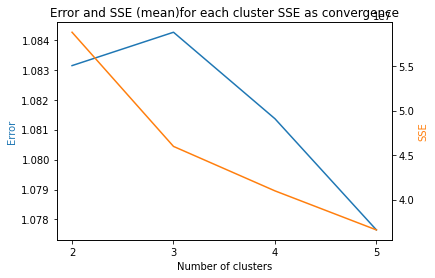

In [37]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
x=error_df_sse['number_of_cluster'].value_counts().index
y1=error_df_sse.groupby(['number_of_cluster']).mean()['error']
ax1.plot(x, y1, color='tab:blue')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Error', color='tab:blue')

ax2 = ax1.twinx()
y2 = error_df_sse.groupby(['number_of_cluster']).mean()['sse']
ax2.plot(x, y2, color='tab:orange')
ax2.set_ylabel('SSE', color='tab:orange')
plt.title('Error and SSE (mean)for each cluster SSE as convergence')
plt.xticks(range(2, 6))
plt.show()


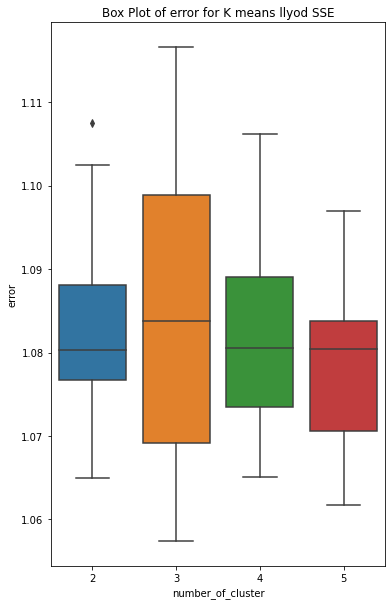

In [38]:
import seaborn as sns
plt.figure(figsize=(6, 10))
sns.boxplot(x=error_df_sse['number_of_cluster'],y=error_df_sse['error'])
plt.title('Box Plot of error for K means llyod SSE')
plt.show()


# Kmeans plus plus 

In [39]:
import pandas as pd
import numpy as np
import swifter
import time
def initialize_centroids_plus(df,k):
    """
    Function to calculate the random centroid using kmeans ++ technique.
    Input: 
        - df: pandas dataframe with the data
        - k: number of clusters
    Output: 
        - centroid.T: pandas dataframe with all centroids initialized
    """
    #Initialize random centroids from dataset
    centroid = []
    centroid.append(df.apply(lambda x: float(x.sample())))
    centroid=pd.DataFrame(centroid)
    column=centroid.columns.to_list()
    ##Randomly created first centroid from the domain of each column in the dataframe
    
    for i in range(1,k):
    ## The above for loop is for generating k-1 clusters as first random cluster is already generated
        distance=pd.DataFrame()
    ## Creating dataframe of distance. This will store the distance of each datapoint from each cluster
        for j in range(len(centroid)):
    ##This for loop is for finding distance from each centroid
            a=pd.DataFrame([np.sqrt(np.sum(np.square(df[column] - centroid.iloc[j][column]), axis=1))]).T
            
            distance=pd.concat([distance,a],axis=1)
    ## Distance_min stores the minimum distance of each point from all the centroids   
        distance_min=distance.min(axis=1)
    ##Calculates probability for each datapoint
        probability = distance_min / distance_min.sum()
    ## Selecting the next centroid based on the probability which is proportional to find square distance
        new_centroid = pd.DataFrame(df.iloc[np.random.choice(len(df),p=probability)]).T
    
        centroid=pd.concat([centroid,new_centroid],ignore_index=True)
        centroid.index.name='Label'
    ## Concatenated the centroid dataframe with new centroid and loop continues until all k centroids are initialized randomly
    return centroid.T
        


def assign_labels(df, centroids):
    """
    Function to calculate the closest centroid label for each row in a dataframe.
    Input: 
        - df: pandas dataframe with the data
        - centroids: pandas dataframe with the centroids as columns and index as label
    Output: 
        - distances.idxmin(axis=1): pandas series with the label of the closest centroid for each row in df
    """
    distances = centroids.swifter.apply(lambda x: np.sqrt(((df - x) ** 2).sum(axis=1))) # Calculate the Euclidean distance between each row in df and each centroid
    return distances.idxmin(axis=1) # Get the index of the minimum distance, which corresponds to the label of the closest centroid


def new_centroids(df_label, df1):
    """
    Function to calculate the new centroids based on the current labels of the rows.
    Input: 
        - df_label: pandas series with the label of the closest centroid for each row in df1
        - df1: pandas dataframe with the data
    Output: 
        - new_centroids.T: pandas dataframe with the new centroids as columns and index as feature name
    """
    joined_df = df1.join(df_label)
    joined_df.rename(columns={0: 'Label'}, inplace=True) # Rename the column with the label
    # Calculate the mean of the rows with the same label
    return joined_df.groupby('Label').mean().T # Transpose the dataframe to have the new centroids as columns and index as feature name





def error_clusters(df_new_centroids,df1,df_label):
    """
    Calculate the error rate of each cluster.

    Args:
    - df_label (pandas.DataFrame): the label of the nearest centroid for each data point.
    - df1 (pandas.DataFrame): the dataset.
    - df_new_centroids (pandas.DataFrame): The new centroids computed in the current iteration.

    Returns:
    - error_rate (float): the total error rate of all clusters.
    """
    

    #Calculate mean value 
    mean_centroid=df1.groupby('readmitted').mean().reset_index()
    # Transpose the new centroids dataframe and reset the index
    new_centroids= df_new_centroids.T
    # Get the columns of the data dataframe
    columns = df1.columns

    sse = []
    # Compute the distance between each data point and its assigned centroid
    for i in range(len(new_centroids)):   #### centroid
        s=[]
        for j in range(len(mean_centroid)): ### mean centroid
        # Compute the distance between each data point and its assigned centroid
            distance = np.sum(np.square(mean_centroid[mean_centroid['readmitted']==j][columns] - new_centroids.iloc[i][columns]), axis=1)
            s.append(distance.iloc[0])
        sse.append(s)
    ## key  is the cluster number and value is the merged value
    merge_label=pd.DataFrame(sse).idxmin(axis=1).to_dict() 
    ## Merging cluster based on the target variable
    df_label[0]=df_label[0].replace(merge_label)
    
    df1 = df1.join(df_label) # add the label column to the dataset
    df1.rename(columns={0: 'Label'}, inplace=True) # rename the label column
    error_list = []
    for i in df1['Label'].value_counts().index:
        df_cluster = df1[df1['Label'] == i] # filter the dataset to include only the data points in the current cluster
        y = len(df_cluster[df_cluster['readmitted'] == 1]) # count the number of data points in the current cluster that were readmitted
        n = len(df_cluster[df_cluster['readmitted'] == 0]) # count the number of data points in the current cluster that were not readmitted
        if y == 0 and n == 0:
            error = 0
        else:
            error = n / (n + y) # calculate the error rate of the current cluster
        error_list.append(error)
    return round(sum(error_list),4)


def sum_of_square_error(new_centroids, data, labels):
    """
    Computes the sum of squared errors between the data points and their assigned centroids.

    Args:
    new_centroids (DataFrame): The new centroids computed in the current iteration.
    data (DataFrame): The input data points.
    labels (DataFrame): The labels assigned to each data point.

    Returns:
    The sum of squared errors.
    """
    # Transpose the new centroids dataframe and reset the index
    new_centroids = new_centroids.T.reset_index()
    # Get the columns of the data dataframe
    columns = data.columns
    # Join the data dataframe and the labels dataframe
    data = data.join(labels)
    # Rename the '0' column of the labels dataframe to 'Label'
    data.rename(columns={0:'Label'}, inplace=True)
    sse = []
    # Compute the distance between each data point and its assigned centroid
    for i in range(len(new_centroids)):
        distance = np.sum(np.square(data[data['Label']==i][columns] - new_centroids.iloc[i][columns]), axis=1)
        sse.append(sum(distance))
    # Return the sum of squared errors
    return sum(sse)   



def kmeans_plus_plus(df1,k,tou):
    """
    Function to run the K-means plus plus algorithm.
    Input: 
        - df1: pandas dataframe with the data
        - k: integer number of clusters
        - tou: float tolerance level to stop the algorithm

    """
    start_time=time.time()
    iteration=0
    centroids=initialize_centroids_plus(df1,k)
    initial_list_of_columns=centroids.columns.to_list()

    
    while True:
        
        
        #Assigning labels to randomly generated centroids
        df_label=assign_labels(df1,centroids)
        df_label=pd.DataFrame(df_label)
        #Calculating new centroids
        
        df_new_centroids=new_centroids(df_label,df1)
        new_list_of_columns=df_new_centroids.columns.to_list()
        #Keeping the number of clusters same
        for i in initial_list_of_columns:
            if i not in new_list_of_columns:
                df_new_centroids[i]=centroids[i]
        
        #Calculate tao
        distance = []
        for col in centroids.columns:
            col_distance = euclidean(centroids[col], df_new_centroids[col])
            distance.append(col_distance)
        tao_calculated=float(sum(distance))/k #Used the formula provided for calculating Tao

 
        
        
        end_time=time.time()
        if iteration>100:
            print("Iteration exceeded")
            error=error_clusters(df_new_centroids,df1,df_label)
            sse= sum_of_square_error(df_new_centroids,df1,df_label)
            return error,sse,end_time-start_time
            
        if tao_calculated<tou or iteration >100:   #if the convergence is met, kmeans will stop  or else if the convergence is never met, after 100 iteration code will stop
            error=error_clusters(df_new_centroids,df1,df_label)      # otherwise indefinite loop
            sse= sum_of_square_error(df_new_centroids,df1,df_label)  
            return error,sse,end_time-start_time
            break
        else:
            centroids= df_new_centroids  # In case we need more iterations, the centroids calculated at this step acts as input
        
        iteration+=1


In [40]:
kmeans_plus_plus(df_cleaned_dia,2,10)

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

(1.0684, 149663780.78656608, 2.594388961791992)

In [41]:
error_matrix_plus_diab=[]
for i in range(2,6):
    for j in range(1,21):
        error,sse,run_time=kmeans_plus_plus(df_cleaned_dia,i,10)
        error_matrix_plus_diab.append([i,j,error,sse,run_time])
error_df_plus_diab= pd.DataFrame(error_matrix_plus_diab,columns=['number_of_cluster', 'iteration', 'error','sse','run_time'])
error_df_plus_diab

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

,number_of_cluster,iteration,error,sse,run_time
0,2,1,1.0973,1.484306e+08,1.713175
1,2,2,1.0885,1.573823e+08,1.690235
2,2,3,1.0809,1.407097e+08,2.592176
3,2,4,1.0884,1.648600e+08,2.668685
4,2,5,1.0681,1.562537e+08,2.831541
...,...,...,...,...,...
75,5,16,1.0734,1.716923e+08,12.108852
76,5,17,1.0791,2.622857e+08,12.758239
77,5,18,1.0792,1.503245e+08,11.066128
78,5,19,1.0821,1.973405e+08,12.352885


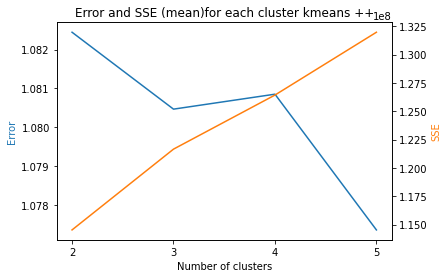

In [42]:


import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
x=error_df_plus_diab['number_of_cluster'].value_counts().index
y1=error_df_plus_diab.groupby(['number_of_cluster']).mean()['error']
ax1.plot(x, y1, color='tab:blue')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Error', color='tab:blue')

ax2 = ax1.twinx()
y2 = error_df_plus_diab.groupby(['number_of_cluster']).mean()['sse']
ax2.plot(x, y2, color='tab:orange')
ax2.set_ylabel('SSE', color='tab:orange')
plt.title('Error and SSE (mean)for each cluster kmeans ++')
plt.xticks(range(2, 6))
plt.show()


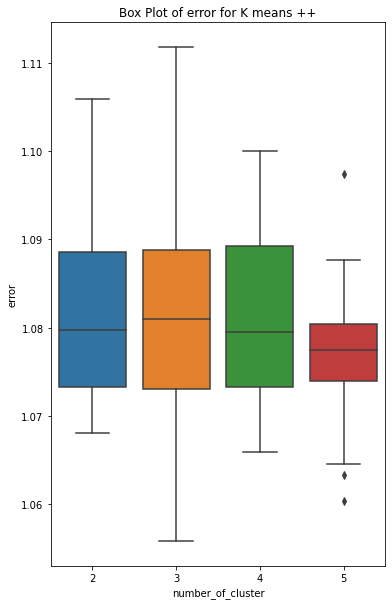

In [43]:
import seaborn as sns
plt.figure(figsize=(6, 10))
sns.boxplot(x=error_df_plus_diab['number_of_cluster'],y=error_df_plus_diab['error'])
plt.title('Box Plot of error for K means ++')
plt.show()


Box plots

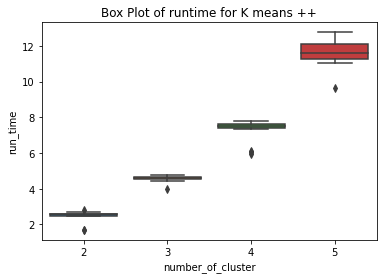

In [44]:
import seaborn as sns
sns.boxplot(x=error_df_plus_diab['number_of_cluster'],y=error_df_plus_diab['run_time'])
plt.title('Box Plot of runtime for K means ++')
plt.show()


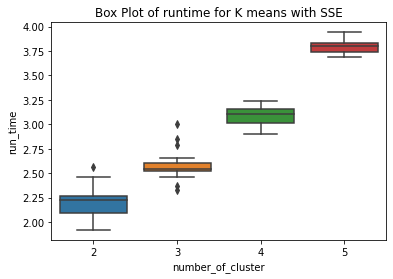

In [45]:
import seaborn as sns
sns.boxplot(x=error_df_sse['number_of_cluster'],y=error_df_sse['run_time'])
plt.title('Box Plot of runtime for K means with SSE')
plt.show()


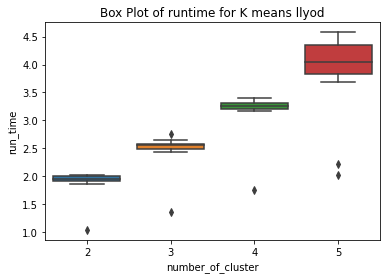

In [46]:
import seaborn as sns
sns.boxplot(x=error_df_diab['number_of_cluster'],y=error_df_diab['run_time'])
plt.title('Box Plot of runtime for K means llyod')
plt.show()


In [47]:

error_df_diab['algo']='kmeans'
error_df_sse['algo']='kmeans_sse'
error_df_plus_diab['algo']='kmeans_++'

run_time_diab=pd.DataFrame()
run_time_diab=pd.concat( [ error_df_diab[['algo','number_of_cluster', 'iteration', 'run_time','sse']],
    error_df_sse[['algo','number_of_cluster', 'iteration', 'run_time','sse']],
    error_df_plus_diab[['algo','number_of_cluster', 'iteration', 'run_time','sse']]
                        ],ignore_index=True )

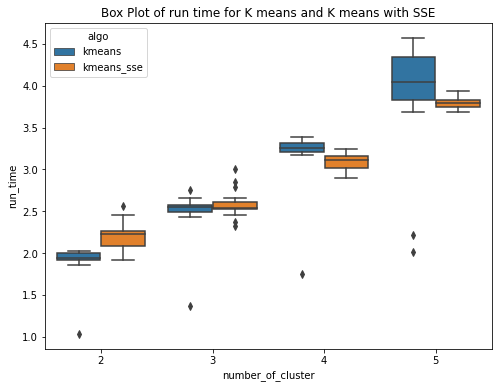

In [48]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(x='number_of_cluster', y='run_time', hue='algo',
            data=run_time_diab[run_time_diab['algo'].isin (['kmeans','kmeans_sse'])],ax=ax);
plt.title('Box Plot of run time for K means and K means with SSE')
plt.show()

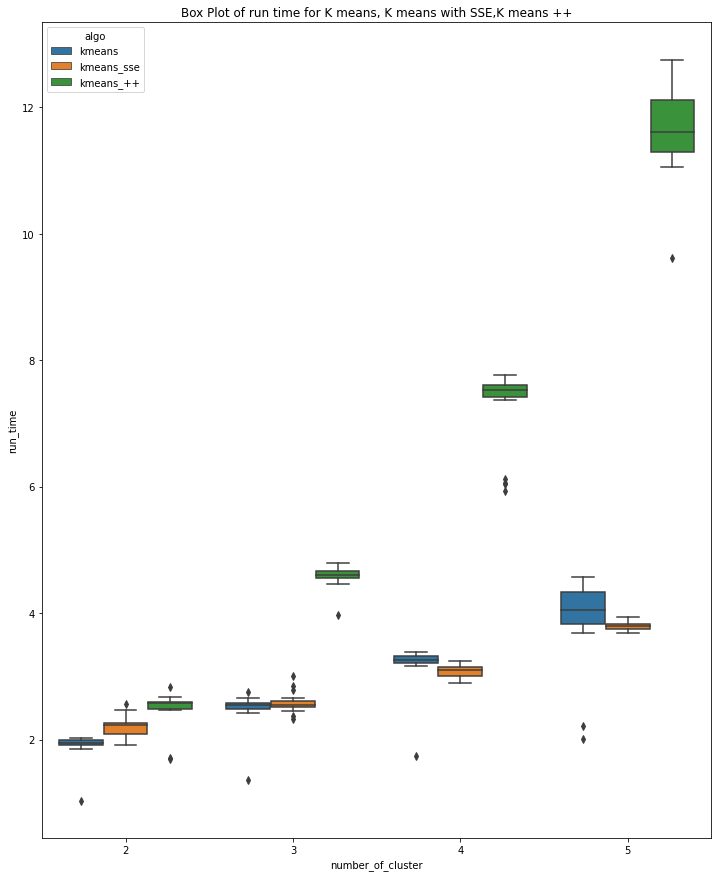

In [49]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 15))

sns.boxplot(x='number_of_cluster', y='run_time', hue='algo',
            data=run_time_diab,ax=ax);
plt.title('Box Plot of run time for K means, K means with SSE,K means ++')
plt.show()

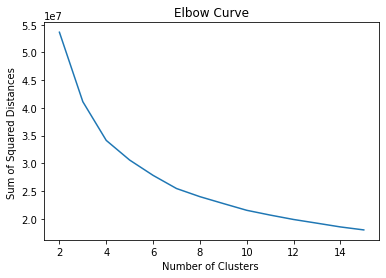

In [50]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define a range of k values to test
k_range = range(2, 16)

# Create an empty list to hold the Sum of Squared Distances (SSD) for each k value
ssd_values = []

# Calculate SSD for each k value and append it to ssd_values
for k in k_range:
    # Create a KMeans object with the current k value
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fit the KMeans object to the data
    kmeans.fit(df_cleaned_dia)
    # Append the SSD value to ssd_values
    ssd_values.append(kmeans.inertia_)

# Plot the elbow curve to find the optimal k value
plt.plot(k_range, ssd_values)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters ')
plt.ylabel('Sum of Squared Distances ')
plt.show()

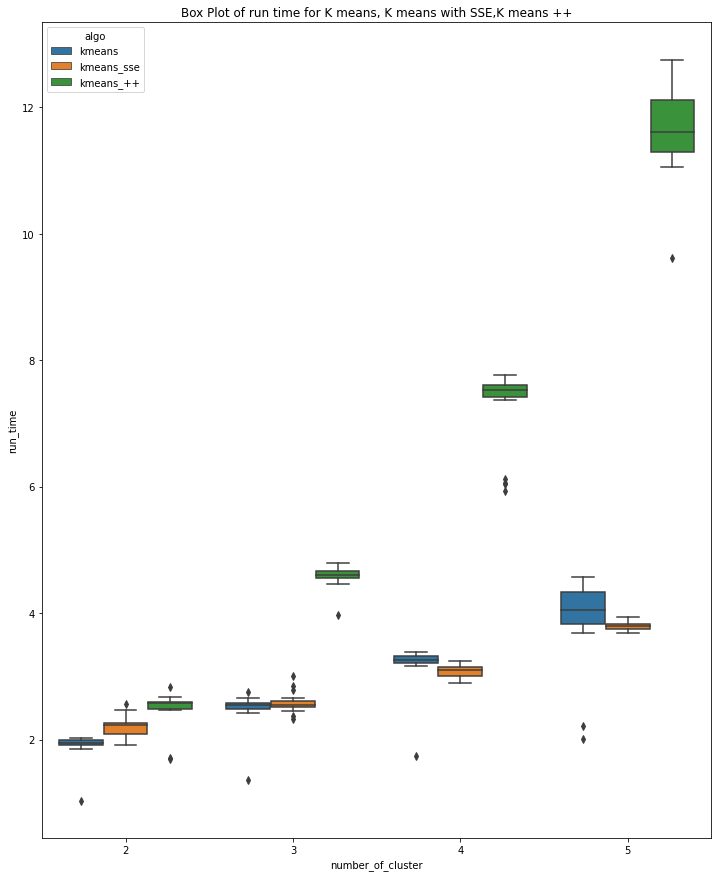

In [51]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 15))

sns.boxplot(x='number_of_cluster', y='run_time', hue='algo',
            data=run_time_diab,ax=ax);
plt.title('Box Plot of run time for K means, K means with SSE,K means ++')
plt.show()